**Copy images and annotation from drive**

In [0]:
# %cp '/content/drive/My Drive/SIMS_Dataset/images.zip' /content/
# %cp '/content/drive/My Drive/SIMS_Dataset/training.txt' /content/
# %cp '/content/drive/My Drive/SIMS_Dataset/test.txt' /content/
# %cp '/content/drive/My Drive/SIMS_Dataset/validation.txt' /content/
# !unzip images.zip -d /content/

**Preprocessing** Did once and copied processed categories into drive for later usage

In [0]:
# #making directories

# !mkdir yolo_train/
# !mkdir yolo_train/images
# !mkdir yolo_train/labels

# !mkdir yolo_test/
# !mkdir yolo_test/images
# !mkdir yolo_test/labels

# !mkdir yolo_val/
# !mkdir yolo_val/images
# !mkdir yolo_val/labels

In [0]:
# #separate images based on train,val and test and put corresponding files into 
# #respective folder having images and labels as subfolders in it
# import shutil
# import os

# def copy(filepath,dest_dir):
#     with open(filepath) as fp:
#         for line in fp:
#             os.makedirs(dest_dir, exist_ok=True)  # succeeds even if directory exists.
#             shutil.copy(line.replace('\n', ''), dest_dir+"images") #image
#             shutil.copy(line.replace('.jpg\n', '.txt'), dest_dir+"labels") ##label
#     print("Done: "+ filepath)
            
# copy('./training.txt','yolo_train/')
# copy('./validation.txt','yolo_val/')
# copy('./test.txt','yolo_test/')

**copy pre-processed data for yolov3 work, clone and install install requirements**

In [0]:
# #update paths of train,test,val

def copy(filepath,newfile,binder):
    with open(filepath) as fp:
      print(filepath)
      for line in fp:
        in_file = line[2:]
        new = binder+in_file
        with open(newfile, "a") as f:
          f.write(new)

# copy('training.txt','Dataset/yolo_train/yolo_train.txt',
#      "/content/yolov3/Dataset/yolo_train/")

# copy('test.txt','Dataset/yolo_test/yolo_test.txt',
#      "/content/yolov3/Dataset/yolo_test/")

# copy('validation.txt','Dataset/yolo_val/yolo_val.txt',
#      "/content/yolov3/Dataset/yolo_val/")

In [0]:
# %cp '/content/drive/My Drive/SIMS_Dataset/training.txt' /content/yolov3/
# %cp '/content/drive/My Drive/SIMS_Dataset/test.txt' /content/yolov3/
# %cp '/content/drive/My Drive/SIMS_Dataset/validation.txt' /content/yolov3/

In [0]:
# #Copied dataset and relevant files to drive
# !zip -r SIMS_Dataset_yolo.zip /content/yolov3/Dataset/
# !cp /content/yolov3/SIMS_Dataset_yolo.zip '/content/drive/My Drive/SIMS_Dataset'

In [1]:
!git clone https://github.com/ultralytics/yolov3
%cd yolov3/
!pip install -U -r requirements.txt

Cloning into 'yolov3'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 9094 (delta 2), reused 7 (delta 1), pack-reused 9082
Receiving objects: 100% (9094/9094), 7.07 MiB | 19.61 MiB/s, done.
Resolving deltas: 100% (6262/6262), done.
/content/yolov3
     |████████████████████████████████| 20.2MB 38.5MB/s 
     |████████████████████████████████| 28.2MB 79kB/s 
Requirement already up-to-date: torch>=1.5 in /usr/local/lib/python3.6/dist-packages (from -r requirements.txt (line 4)) (1.5.0+cu101)
Requirement already up-to-date: matplotlib in /usr/local/lib/python3.6/dist-packages (from -r requirements.txt (line 5)) (3.2.1)
Requirement already up-to-date: pycocotools in /usr/local/lib/python3.6/dist-packages (from -r requirements.txt (line 6)) (2.0.0)
     |████████████████████████████████| 71kB 11.8MB/s 
     |████████████████████████████████| 2.1MB 43.8MB/s 
Requirement already up-to-date: 

**created sims_classes.names and sims.data files**

In [1]:
%cd yolov3

/content/yolov3


In [6]:
# #using copied/preprocessed data now
# #!mkdir /content/yolov3/Dataset
%cp '/content/drive/My Drive/SIMS_Dataset/SIMS_Dataset_yolo.zip' /content/yolov3/
!unzip SIMS_Dataset_yolo.zip -d /content/yolov3/

Streaming output truncated to the last 5000 lines.
  inflating: /content/yolov3/content/yolov3/Dataset/yolo_train/labels/2984.txt  
  inflating: /content/yolov3/content/yolov3/Dataset/yolo_train/labels/0349.txt  
  inflating: /content/yolov3/content/yolov3/Dataset/yolo_train/labels/2089.txt  
  inflating: /content/yolov3/content/yolov3/Dataset/yolo_train/labels/1280.txt  
  inflating: /content/yolov3/content/yolov3/Dataset/yolo_train/labels/2843.txt  
  inflating: /content/yolov3/content/yolov3/Dataset/sims_classes.names  
   creating: /content/yolov3/content/yolov3/Dataset/yolo_val/
   creating: /content/yolov3/content/yolov3/Dataset/yolo_val/images/
  inflating: /content/yolov3/content/yolov3/Dataset/yolo_val/images/4065.jpg  
  inflating: /content/yolov3/content/yolov3/Dataset/yolo_val/images/4209.jpg  
  inflating: /content/yolov3/content/yolov3/Dataset/yolo_val/images/1464.jpg  
  inflating: /content/yolov3/content/yolov3/Dataset/yolo_val/images/4014.jpg  
  inflating: /content/yo

In [4]:
#download pretrained weights
!. weights/download_yolov3_weights.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   1924      0 --:--:-- --:--:-- --:--:--  1924
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  236M    0  236M    0     0  73.3M      0 --:--:--  0:00:03 --:--:--  100M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   2487      0 --:--:-- --:--:-- --:--:--  2487
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  240M    0  240M    0     0  70.2M      0 --:--:--  0:00:03 --:--:-- 80.9M


In [0]:
#start training
!python3 train.py --batch 8 --epochs 60 --img-size 512 --data Dataset/sims.txt --cache-images --rec --cfg yolov3-spp.cfg --name from_yolov3_spp --weights weights/yolov3-spp.pt
#--img-size 1024 --cache-images --nosave --evolve

Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Namespace(adam=False, batch_size=8, bucket='', cache_images=True, cfg='yolov3-spp.cfg', data='Dataset/sims.txt', device='', epochs=60, evolve=False, img_size=[512], multi_scale=False, name='from_yolov3_spp', nosave=False, notest=False, rect=True, resume=False, single_cls=False, weights='weights/yolov3-spp.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/
2020-05-06 22:39:03.493446: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Model Summary: 225 layers, 6.26487e+07 parameters, 6.26487e+07 gradients
Optimizer groups: 76 .bias, 76 Conv2d.weight, 73 other
Caching labels (3232 found, 0 missing, 0 empty, 0 duplicate, for 3233 images): 100% 3233/3233 [00:00<00:00, 7908.87it/s]
Caching images (1.9GB): 100% 3233/3233 [00:4

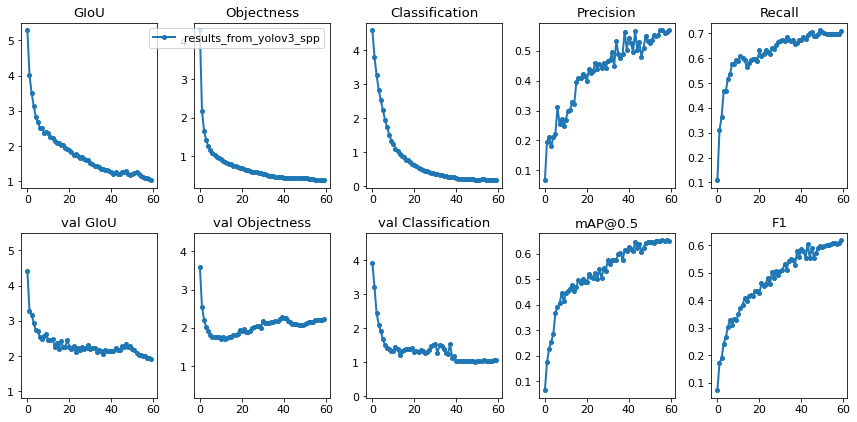

In [0]:
from utils import utils;
utils.plot_results()

In [0]:
#load already trained model for 60 epochs
%cp '/content/drive/My Drive/SIMS_Dataset/yolov3 spp/60 epochs/last_from_yolov3_spp.pt' /content/yolov3/weights

In [0]:
%cp /content/yolov3/weights/last_from_yolov3_spp.pt '/content/drive/My Drive/SIMS_Dataset'
%cp /content/yolov3/weights/best_from_yolov3_spp.pt '/content/drive/My Drive/SIMS_Dataset'

In [0]:
# Load the TensorBoard notebook extension
%load_ext tensorboard
%tensorboard --logdir=runs

In [0]:
!python3 detect.py --names Dataset/sims_classes.names --cfg yolov3-spp.cfg --img-size 1024 --weights weights/last_from_yolov3_spp.pt

Namespace(agnostic_nms=False, augment=False, cfg='yolov3-spp.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=1024, iou_thres=0.6, names='Dataset/sims_classes.names', output='output', save_txt=False, source='data/samples', view_img=False, weights='weights/last_from_yolov3_spp.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Model Summary: 225 layers, 6.26487e+07 parameters, 6.26487e+07 gradients
image 1/2 data/samples/0073.jpg: 768x1024 1 airliners, Done. (0.093s)
image 2/2 data/samples/2644.jpg: 768x1024 2 cars, 1 vans, Done. (0.063s)
Results saved to /content/yolov3/output
Done. (0.360s)


In [0]:
#test on last model
!python3 test.py --data Dataset/sims_test.txt --cfg yolov3-spp.cfg --batch-size 8 --weights weights/last_from_yolov3_spp.pt --save-json --img-size 512

Namespace(augment=False, batch_size=8, cfg='yolov3-spp.cfg', conf_thres=0.001, data='Dataset/sims_test.txt', device='', img_size=512, iou_thres=0.6, save_json=True, single_cls=False, task='test', weights='weights/last_from_yolov3_spp.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Model Summary: 225 layers, 6.26487e+07 parameters, 6.26487e+07 gradients
Fusing layers...
Model Summary: 152 layers, 6.26219e+07 parameters, 6.26219e+07 gradients
Caching labels (747 found, 0 missing, 0 empty, 0 duplicate, for 748 images): 100% 748/748 [00:00<00:00, 1285.03it/s]
               Class    Images   Targets         P         R   mAP@0.5        F1: 100% 94/94 [00:22<00:00,  4.18it/s]
                 all       748  7.98e+03      0.56     0.705     0.656     0.614
                 car       748  3.68e+03     0.776     0.864     0.867     0.818
               truck       748       446     0.546      0.78     0.724     0.642
                 van       748       87

In [0]:
#test on last model
!python3 test.py --data Dataset/sims_test.txt --task test --cfg yolov3-spp.cfg --batch-size 8 --weights weights/best_from_yolov3_spp.pt --save-json --img-size 512

Namespace(augment=False, batch_size=8, cfg='yolov3-spp.cfg', conf_thres=0.001, data='Dataset/sims_test.txt', device='', img_size=512, iou_thres=0.6, save_json=True, single_cls=False, task='test', weights='weights/best_from_yolov3_spp.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Model Summary: 225 layers, 6.26487e+07 parameters, 6.26487e+07 gradients
Fusing layers...
Model Summary: 152 layers, 6.26219e+07 parameters, 6.26219e+07 gradients
Caching labels (747 found, 0 missing, 0 empty, 0 duplicate, for 748 images): 100% 748/748 [00:00<00:00, 8451.72it/s]
               Class    Images   Targets         P         R   mAP@0.5        F1: 100% 94/94 [00:23<00:00,  4.04it/s]
                 all       748  7.98e+03     0.547      0.69      0.66       0.6
                 car       748  3.68e+03     0.773     0.872     0.867      0.82
               truck       748       446     0.558     0.776     0.723     0.649
                 van       748       87

**Resume Training after 60 epochs**

In [0]:
# #Zip yolov3 contents into drive
# !zip -r /content/yolov3_baseline_v1_epochs60.zip /content/yolov3/
# !cp /content/yolov3_baseline_v1_epochs60.zip '/content/drive/My Drive/SIMS_Dataset'

In [7]:
#Resume
#start training
!python3 train.py --resume --batch 8 --epochs 90 --img-size 512 --data Dataset/sims.txt --cache-images --rec --cfg yolov3-spp.cfg --name from_yolov3_spp --weights weights/last.pt
#--img-size 1024 --cache-images --nosave --evolve

Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Namespace(adam=False, batch_size=8, bucket='', cache_images=True, cfg='yolov3-spp.cfg', data='Dataset/sims.txt', device='', epochs=90, evolve=False, img_size=[512], multi_scale=False, name='from_yolov3_spp', nosave=False, notest=False, rect=True, resume=True, single_cls=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/
2020-05-08 02:54:20.340731: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Model Summary: 225 layers, 6.26487e+07 parameters, 6.26487e+07 gradients
Optimizer groups: 76 .bias, 76 Conv2d.weight, 73 other
Caching labels (3232 found, 0 missing, 0 empty, 0 duplicate, for 3233 images): 100% 3233/3233 [00:00<00:00, 7916.63it/s]
Caching images (1.9GB): 100% 3233/3233 

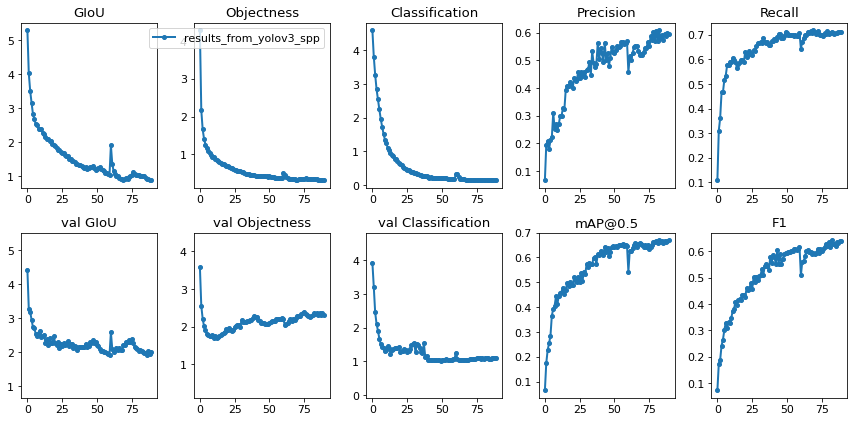

In [8]:
from utils import utils;
utils.plot_results()

In [9]:
#test on last model
!python3 test.py --data Dataset/sims_test.txt --cfg yolov3-spp.cfg --batch-size 8 --weights weights/last_from_yolov3_spp.pt --save-json --img-size 512

Namespace(augment=False, batch_size=8, cfg='yolov3-spp.cfg', conf_thres=0.001, data='Dataset/sims_test.txt', device='', img_size=512, iou_thres=0.6, save_json=True, single_cls=False, task='test', weights='weights/last_from_yolov3_spp.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.26487e+07 parameters, 6.26487e+07 gradients
Fusing layers...
Model Summary: 152 layers, 6.26219e+07 parameters, 6.26219e+07 gradients
Caching labels (747 found, 0 missing, 0 empty, 0 duplicate, for 748 images): 100% 748/748 [00:00<00:00, 1374.89it/s]
               Class    Images   Targets         P         R   mAP@0.5        F1: 100% 94/94 [00:17<00:00,  5.24it/s]
                 all       748  7.98e+03     0.586     0.712     0.679     0.636
                 car       748  3.68e+03     0.785     0.856     0.859     0.819
               truck       748       446      0.57     0.767     0.727     0.654
                 van       

In [10]:
#test on best model
!python3 test.py --data Dataset/sims_test.txt --cfg yolov3-spp.cfg --batch-size 8 --weights weights/best_from_yolov3_spp.pt --save-json --img-size 512

Namespace(augment=False, batch_size=8, cfg='yolov3-spp.cfg', conf_thres=0.001, data='Dataset/sims_test.txt', device='', img_size=512, iou_thres=0.6, save_json=True, single_cls=False, task='test', weights='weights/best_from_yolov3_spp.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.26487e+07 parameters, 6.26487e+07 gradients
Fusing layers...
Model Summary: 152 layers, 6.26219e+07 parameters, 6.26219e+07 gradients
Caching labels (747 found, 0 missing, 0 empty, 0 duplicate, for 748 images): 100% 748/748 [00:00<00:00, 7106.25it/s]
               Class    Images   Targets         P         R   mAP@0.5        F1: 100% 94/94 [00:17<00:00,  5.31it/s]
                 all       748  7.98e+03     0.603     0.714     0.677     0.644
                 car       748  3.68e+03     0.791     0.854     0.856     0.821
               truck       748       446     0.566      0.76     0.724     0.649
                 van       

In [29]:
!python3 detect.py --names Dataset/sims_classes.names --cfg yolov3-spp.cfg --img-size 1024 --weights '/content/drive/My Drive/SIMS_Dataset/yolov3 spp/best_from_yolov3_spp.pt'

Namespace(agnostic_nms=False, augment=False, cfg='yolov3-spp.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=1024, iou_thres=0.6, names='Dataset/sims_classes.names', output='output', save_txt=False, source='data/samples', view_img=False, weights='/content/drive/My Drive/SIMS_Dataset/yolov3 spp/best_from_yolov3_spp.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.26487e+07 parameters, 6.26487e+07 gradients
image 1/6 data/samples/3716.jpg: 768x1024 11 cars, 1 trucks, 1 vans, Done. (0.044s)
image 2/6 data/samples/3732.jpg: 768x1024 22 cars, 1 trucks, 6 vans, Done. (0.041s)
image 3/6 data/samples/3792.jpg: 768x1024 7 cars, 1 trucks, 2 vans, Done. (0.041s)
image 4/6 data/samples/3820.jpg: 768x1024 Done. (0.041s)
image 5/6 data/samples/4738.jpg: 768x1024 21 cars, 3 trucks, 11 vans, 1 others, Done. (0.041s)
image 6/6 data/samples/4785.jpg: 768x1024 1 longvehicles, 2 buss, Done. (0.